In [ ]:
! dir D:\fork\lipidxplorer-evaluation\190731_benchmark_data_files_infos\190731_mzML_no_zlib

 Volume in drive D is DATA
 Volume Serial Number is 62B3-38E3

 Directory of D:\fork\lipidxplorer-evaluation\190731_benchmark_data_files_infos\190731_mzML_no_zlib

21.12.2021  11:23    <DIR>          .
21.12.2021  11:23    <DIR>          ..
30.07.2020  14:50        52,319,725 190321_Serum_Lipidextract_368723_01.mzML
30.07.2020  14:50        54,281,775 190321_Serum_Lipidextract_368723_02.mzML
30.07.2020  14:50        54,005,662 190321_Serum_Lipidextract_368723_03.mzML
30.07.2020  14:50        54,656,271 190321_Serum_Lipidextract_368723_06.mzML
30.07.2020  14:50        51,467,298 190321_Serum_Lipidextract_368723_07.mzML
30.07.2020  14:50        54,823,344 190321_Serum_Lipidextract_368723_08.mzML
30.07.2020  14:50        54,507,654 190321_Serum_Lipidextract_368723_09.mzML
30.07.2020  14:50        56,178,171 190321_Serum_Lipidextract_368723_10.mzML
30.07.2020  14:50        51,158,903 190322_Serum_Lipidextract_368723_11.mzML
30.07.2020  14:50        48,725,982 190322_Serum_Lipidextract_3687

In [32]:
import pickle
ms =  pickle.load(open(r'D:\fork\lipidxplorer-evaluation\190731_benchmark_data_files_infos\190731_mzML_no_zlib\190731_mzML_no_zlib_127.sc', 'rb'))

In [33]:
tmp_se = ms.listSurveyEntry[0]

In [34]:
lse_m = [se for se in ms.listSurveyEntry if 666 <se.peakMean< 666.9]

In [35]:
sel = lse_m[-1]

In [6]:
sel.peaks[0][0],*next(iter(sel.peaks[0][1].items()))

(666.6180329362161,
 '190322_Serum_Lipidextract_368723_11.mzML',
 37258848.19354839)

In [ ]:
from pathlib import Path


In [ ]:
p = Path(r'D:\fork\lipidxplorer-evaluation\190731_benchmark_data_files_infos\190731_mzML_no_zlib')

In [38]:
mzmls = list(p.glob("*.mzml"))

In [39]:
mzmls

[WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_01.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_02.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_03.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_06.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_07.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_08.mzML'),
 WindowsPath('D:/fork/lipidxplorer-evaluation/190731_benchmark_data_files_infos/190731_mzML_no_zlib/190321_Serum_Lipidextract_368723_09.

In [40]:
from ms_deisotope import MSFileLoader

In [41]:
import pandas as pd
def path2df(path, time_start=0, time_end=float("inf")):
    dfs = []
    with MSFileLoader(str(path)) as r:
        r.get_scan_by_time(time_start / 60)
        r.start_from_scan(r.get_scan_by_time(time_start / 60).id)
        for b in r:
            if time_start / 60 > b.precursor.scan_time > time_end / 60:
                break
            a = b.precursor.arrays
            df = pd.DataFrame({"mz": a.mz, "inty": a.intensity, 'stem': path.stem})
            df["scan_id"] = b.precursor.scan_id
            df["filter_string"] = b.precursor.annotations["filter string"]
            df["precursor_id"] = None
            dfs.append(df)
            # for p in b.products:
            #     if time_start > p.scan_time > time_end:
            #         continue
            #     a = p.arrays
            #     df = pd.DataFrame({"mz": a.mz, "inty": a.intensity})
            #     df["scan_id"] = p.scan_id  # TODO  make them categoriacal?
            #     df["filter_string"] = p.annotations["filter string"]
            #     df["precursor_id"] = b.precursor.scan_id
            #     df.set_index(["scan_id", "filter_string"], append=True, inplace=True)
            #     dfs.append(df)
    df = pd.concat(dfs)
    # df.set_index(
    #     {
    #         "path_stem": path.stem,
    #         "scan_id": b.precursor.scan_id,
    #         "filter_string": b.precursor.annotations["filter string"],
    #         "precursor_id": None,
    #     },
    #     append=True,
    #     inplace=True,
    # )
    # df.attrs = {"path": path}
    # logging.debug(f"from {path} made dataframe...")
    # logging.debug(f"{df}")

    return df

In [27]:
df = pd.concat((path2df(mzml) for mzml in mzmls))

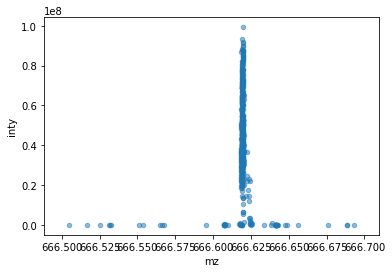

In [14]:
ax = df.query('inty>0 and 666.5 < mz < 666.7').plot.scatter(x='mz', y = 'inty', alpha=0.5)

In [15]:
df

,mz,inty,stem,scan_id,filter_string,precursor_id
0,346.527954,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
1,346.528320,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
2,346.528717,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
3,354.749359,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
4,354.749756,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
...,...,...,...,...,...,...
247,1155.136963,0.0,190322_Serum_Lipidextract_368723_12,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
248,1155.139282,0.0,190322_Serum_Lipidextract_368723_12,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
249,1212.101807,0.0,190322_Serum_Lipidextract_368723_12,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
250,1212.104248,0.0,190322_Serum_Lipidextract_368723_12,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None


In [29]:
out = pd.read_clipboard() # from the outfile ...190731_mzML_no_zlib_127-out

In [30]:
def ppm_range(mz, ppm=3.0):
    err = mz * ppm / 1_000_000
    return mz-err, mz+err

ValueError: scatter requires y column to be numeric

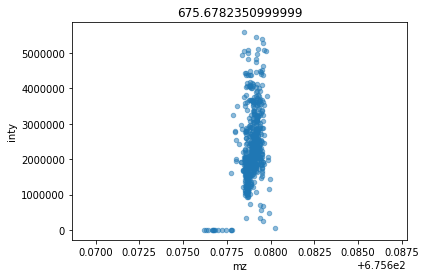

In [42]:
for idx, row in out.head().iterrows():
    ax = df.loc[df.mz.between(*ppm_range(row.MASS))].plot.scatter(x='mz',y='inty', alpha=0.5, title =row.MASS )
    out.loc[[idx]].plot.scatter(x='MASS',y=1, alpha=0.5, ax = ax, color='red')

    print(ppm_range(row.MASS))

In [43]:
out.iloc[[idx], (out.columns.str.startswith("INT")) | (out.columns.str.startswith("MASS"))]

,MASS,INT:190321_Serum_Lipidextract_368723_01.mzML,INT:190321_Serum_Lipidextract_368723_02.mzML,INT:190321_Serum_Lipidextract_368723_03.mzML,INT:190321_Serum_Lipidextract_368723_06.mzML,INT:190321_Serum_Lipidextract_368723_07.mzML,INT:190321_Serum_Lipidextract_368723_08.mzML,INT:190321_Serum_Lipidextract_368723_09.mzML,INT:190321_Serum_Lipidextract_368723_10.mzML,INT:190322_Serum_Lipidextract_368723_11.mzML,INT:190322_Serum_Lipidextract_368723_12.mzML
0,675.678235,931921.9,784701.8,873348.5,944122.9,734553.9,823630.3,1097272.8,1155945.6,709122.9,612828.9


In [44]:
[col for col in out.columns if col.startswith('INT')]

['INT:190321_Serum_Lipidextract_368723_01.mzML',
 'INT:190321_Serum_Lipidextract_368723_02.mzML',
 'INT:190321_Serum_Lipidextract_368723_03.mzML',
 'INT:190321_Serum_Lipidextract_368723_06.mzML',
 'INT:190321_Serum_Lipidextract_368723_07.mzML',
 'INT:190321_Serum_Lipidextract_368723_08.mzML',
 'INT:190321_Serum_Lipidextract_368723_09.mzML',
 'INT:190321_Serum_Lipidextract_368723_10.mzML',
 'INT:190322_Serum_Lipidextract_368723_11.mzML',
 'INT:190322_Serum_Lipidextract_368723_12.mzML']

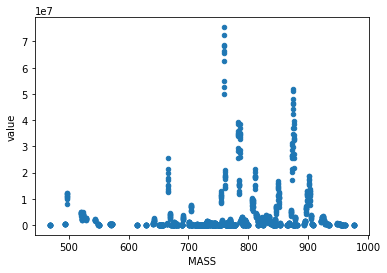

In [45]:
pd.melt(out, id_vars='MASS', value_vars=[col for col in out.columns if col.startswith('INT')]).plot.scatter(x='MASS', y='value')

In [46]:
out_melt = pd.melt(out, id_vars='MASS', value_vars=[col for col in out.columns if col.startswith('INT')])

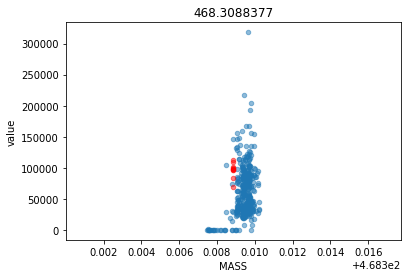

In [47]:
for id,g_df in out_melt.groupby('MASS'):
    ax = df.loc[df.mz.between(*ppm_range(id))].plot.scatter(x='mz',y='inty', alpha=0.5, title =id )
    g_df.plot.scatter(x='MASS', y='value', alpha=0.5, ax = ax, color='red')
    break

# from lx1 hook

In [48]:
lx1_df = pd.read_pickle('lx1_bins.pkl') #only ms1 and before alignment

In [49]:
lx1_df.columns = "spectra cluster scan mass inty".split()
lx1_df

,spectra,cluster,scan,mass,inty
0,190321_Serum_Lipidextract_368723_01.mzML,0,17,350.002167,21524.480469
1,190321_Serum_Lipidextract_368723_01.mzML,0,11,350.002197,21179.408203
2,190321_Serum_Lipidextract_368723_01.mzML,0,18,350.002197,24378.822266
3,190321_Serum_Lipidextract_368723_01.mzML,0,3,350.002228,17939.382812
4,190321_Serum_Lipidextract_368723_01.mzML,1,24,350.144714,16253.349609
...,...,...,...,...,...
79477,190322_Serum_Lipidextract_368723_12.mzML,8155,13,1199.107788,16049.843750
79478,190322_Serum_Lipidextract_368723_12.mzML,8155,16,1199.107910,82393.156250
79479,190322_Serum_Lipidextract_368723_12.mzML,8155,22,1199.107910,80722.359375
79480,190322_Serum_Lipidextract_368723_12.mzML,8155,26,1199.107910,61578.292969


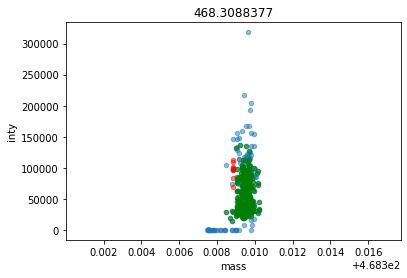

In [50]:
for id,g_df in out_melt.groupby('MASS'):
    ax = df.loc[df.mz.between(*ppm_range(id))].plot.scatter(x='mz',y='inty', alpha=0.5, title =id )
    g_df.plot.scatter(x='MASS', y='value', alpha=0.5, ax = ax, color='red')
    lx1_df.loc[lx1_df.mass.between(*ppm_range(id))].plot.scatter(x='mass',y='inty', alpha=0.5, ax = ax, color='green', )
    break

In [51]:

lpm_df= pd.read_pickle("lx1_before_shift_or_recalibrate.pkl")

In [52]:
lpm_df

,spectra,mass,inty
0,190321_Serum_Lipidextract_368723_01.mzML,350.002196,2742.648185
1,190321_Serum_Lipidextract_368723_01.mzML,350.184588,22869.186429
2,190321_Serum_Lipidextract_368723_01.mzML,350.187116,108657.126890
3,190321_Serum_Lipidextract_368723_01.mzML,350.269426,1633.546056
4,190321_Serum_Lipidextract_368723_01.mzML,350.306010,2308.894405
...,...,...,...
50472,190322_Serum_Lipidextract_368723_12.mzML,1197.829260,73955.747984
50473,190322_Serum_Lipidextract_368723_12.mzML,1198.093953,688365.349798
50474,190322_Serum_Lipidextract_368723_12.mzML,1198.832595,3454.796560
50475,190322_Serum_Lipidextract_368723_12.mzML,1199.095077,178635.704889


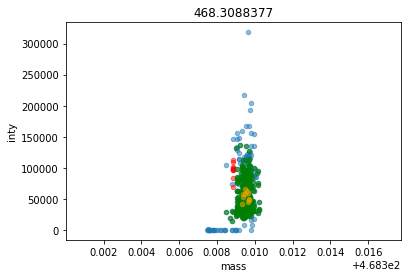

In [53]:
for id,g_df in out_melt.groupby('MASS'):
    ax = df.loc[df.mz.between(*ppm_range(id))].plot.scatter(x='mz',y='inty', alpha=0.5, title =id ) #all peaks
    g_df.plot.scatter(x='MASS', y='value', alpha=0.5, ax = ax, color='red') # peaks from out file
    lx1_df.loc[lx1_df.mass.between(*ppm_range(id))].plot.scatter(x='mass',y='inty', alpha=0.5, ax = ax, color='green', ) #lx1 peaks
    lpm_df.loc[lpm_df.mass.between(*ppm_range(id))].plot.scatter(x='mass',y='inty', alpha=0.5, ax = ax, color='orange') #lx1 bins
    break

missing values for 494.32402469999994
missing values for 652.6027817
missing values for 676.551959
missing values for 706.5983568
missing values for 722.6809852000001
missing values for 724.4898455


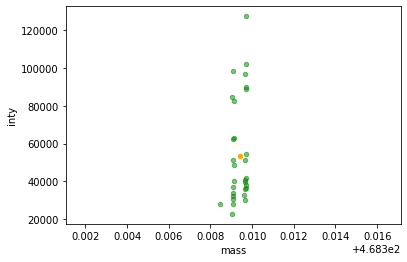

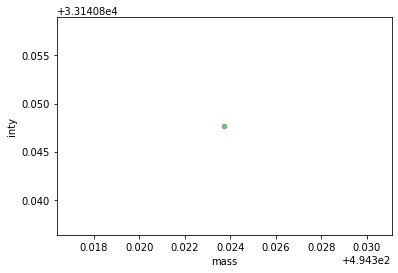

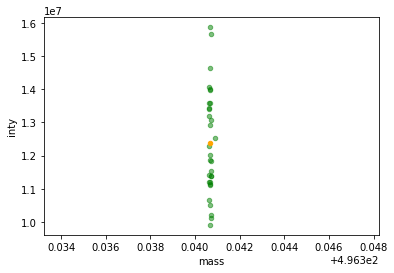

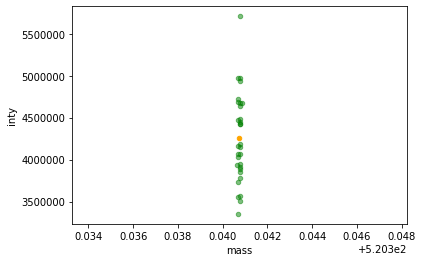

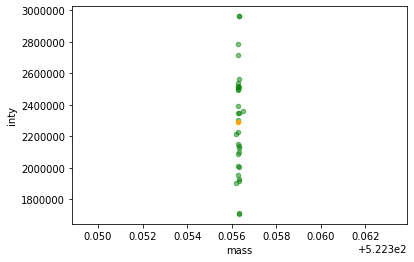

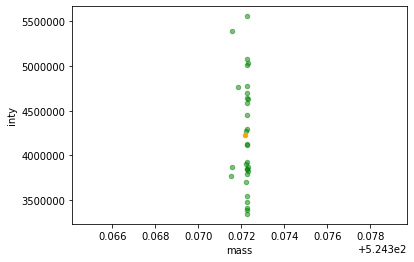

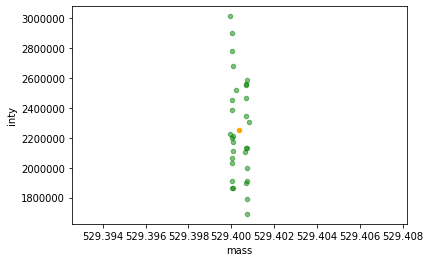

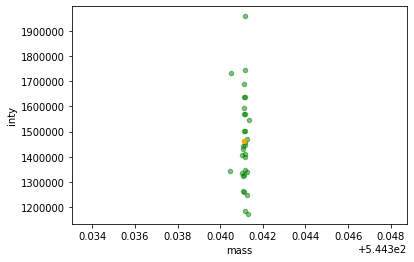

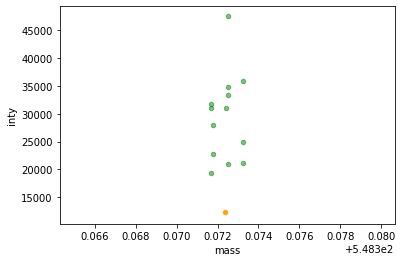

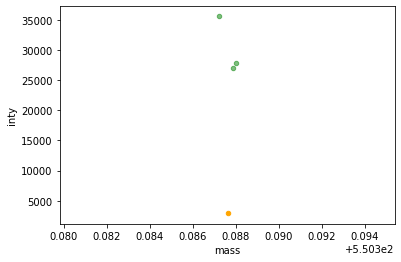

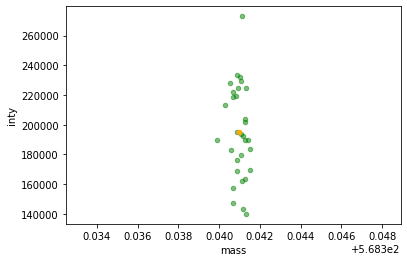

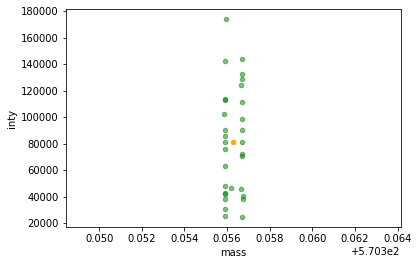

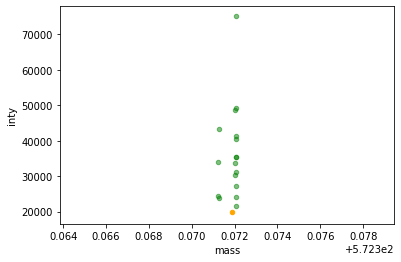

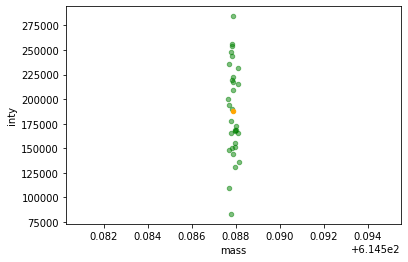

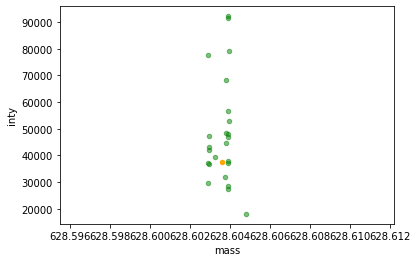

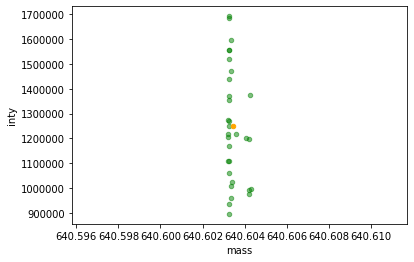

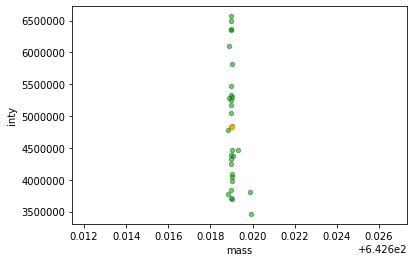

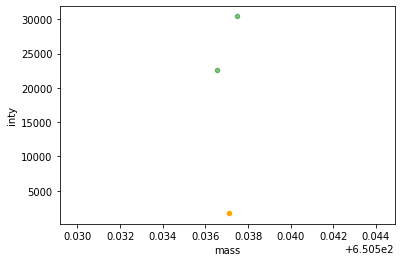

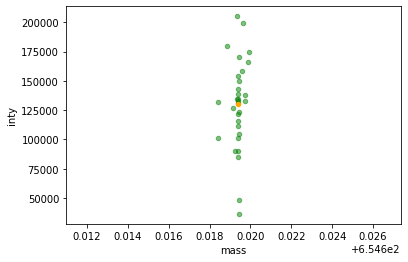

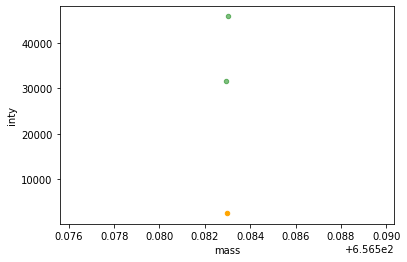

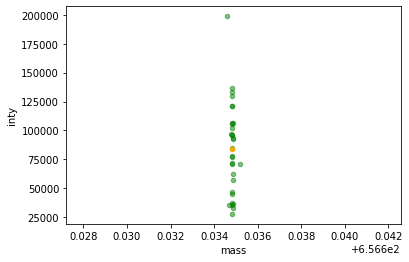

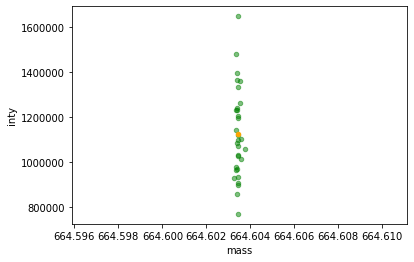

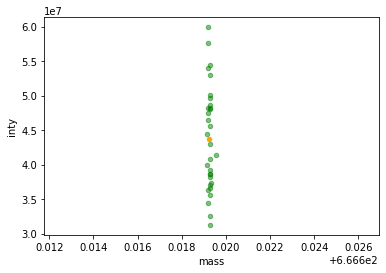

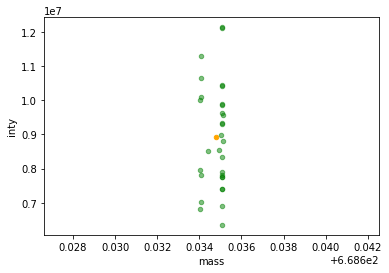

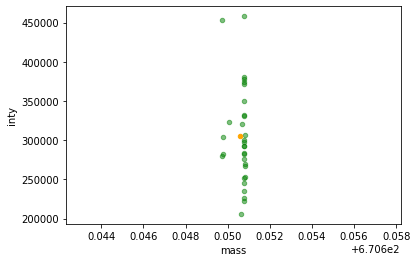

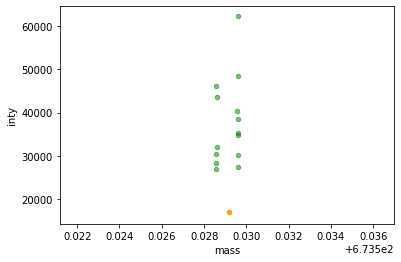

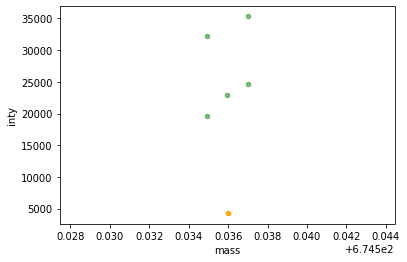

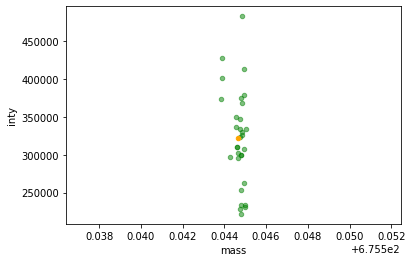

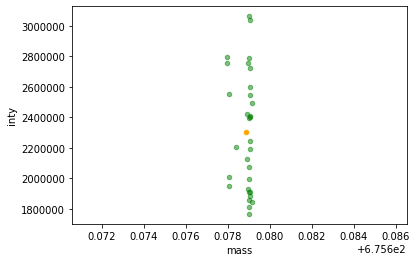

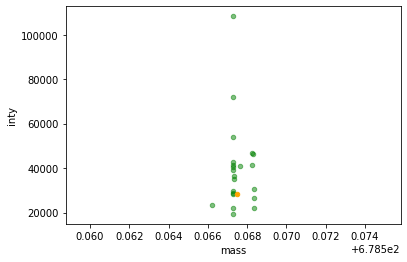

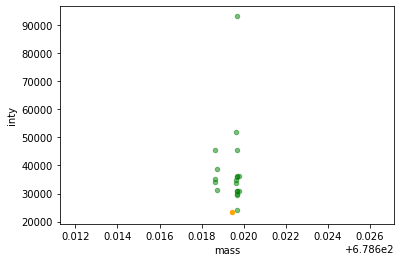

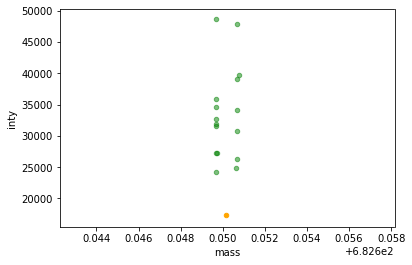

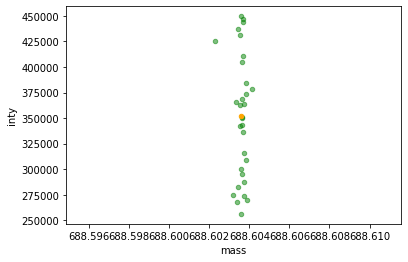

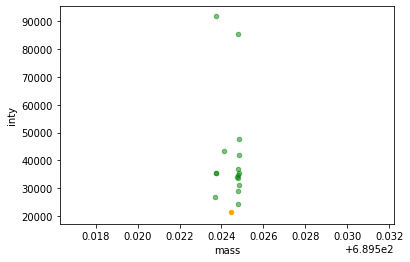

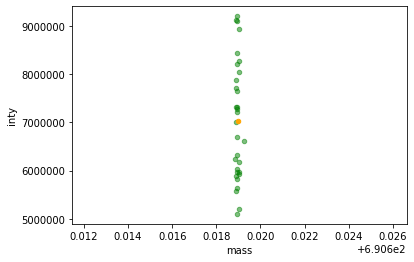

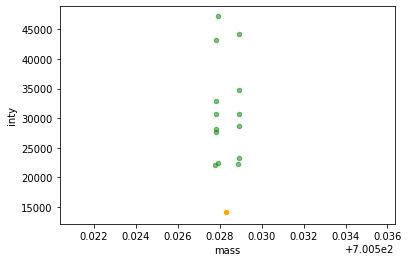

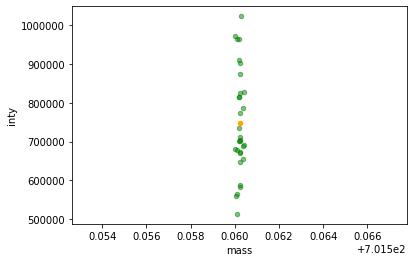

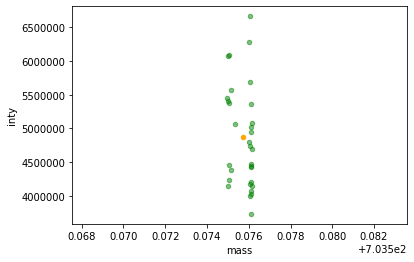

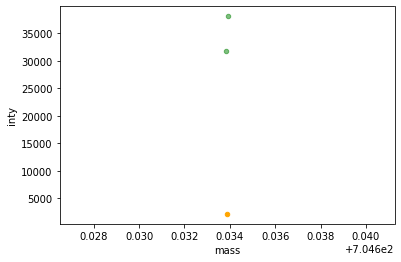

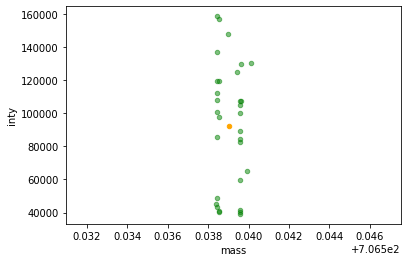

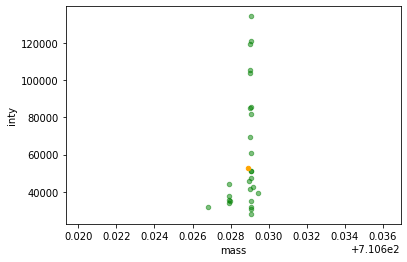

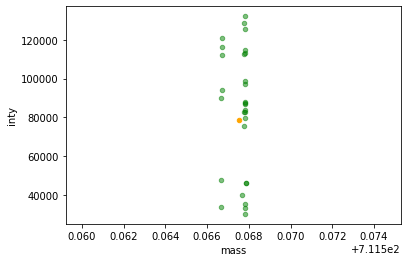

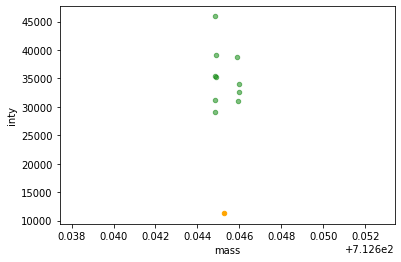

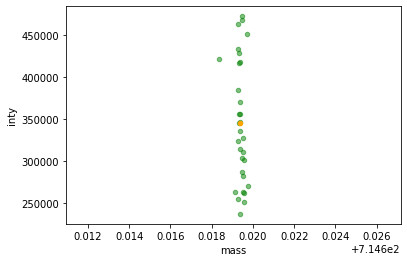

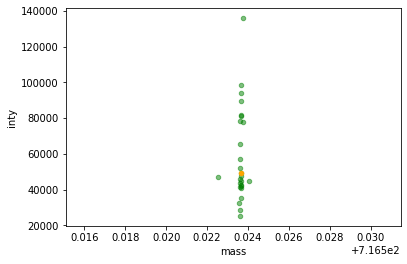

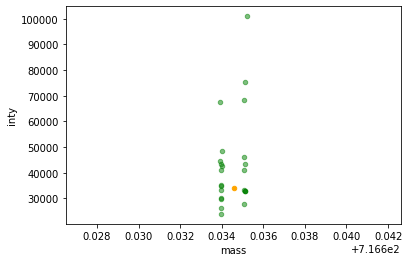

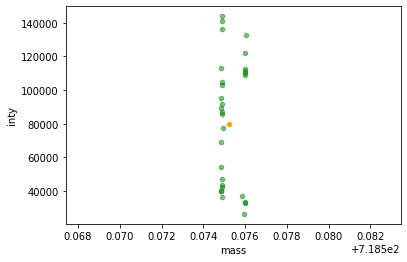

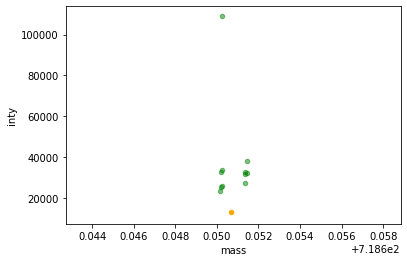

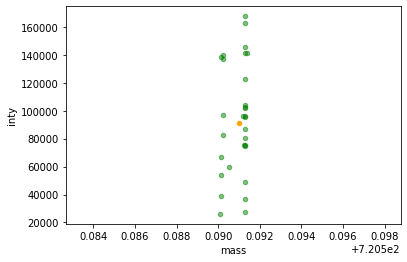

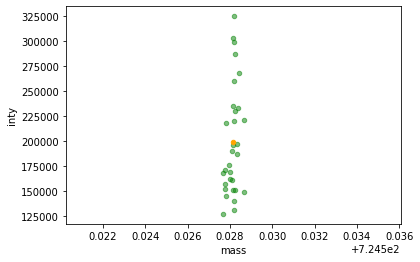

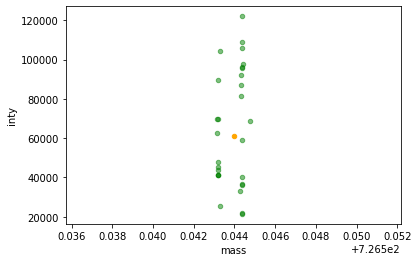

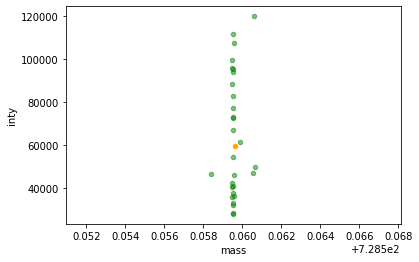

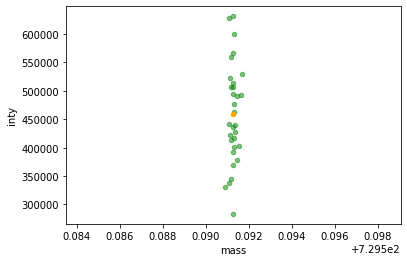

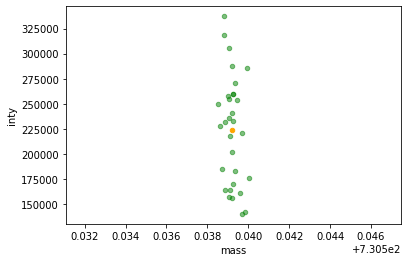

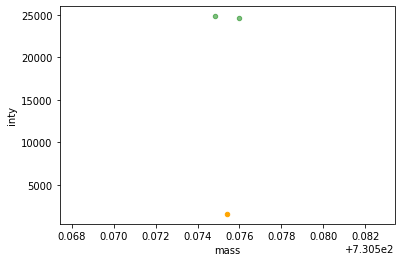

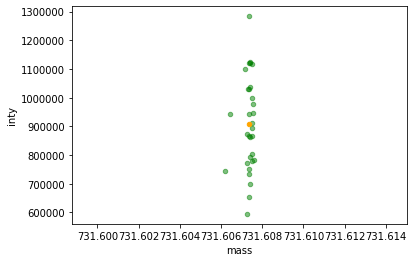

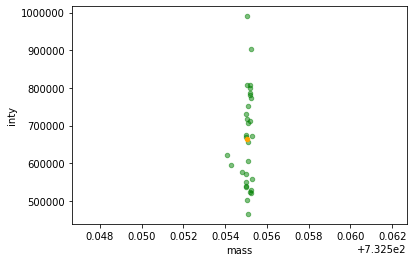

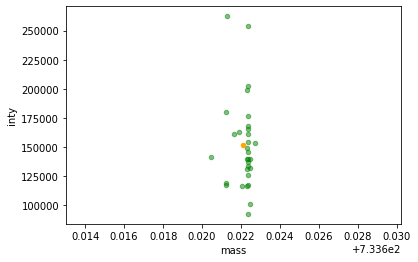

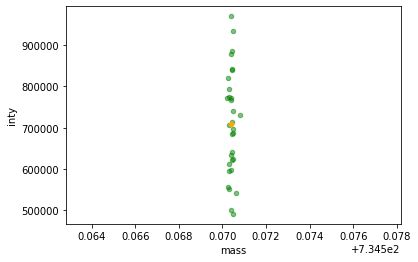

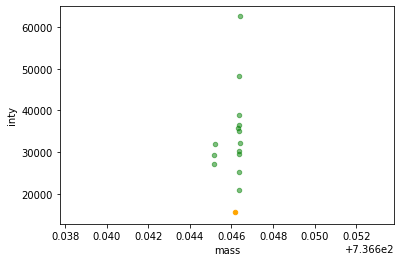

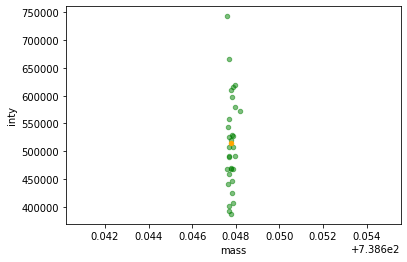

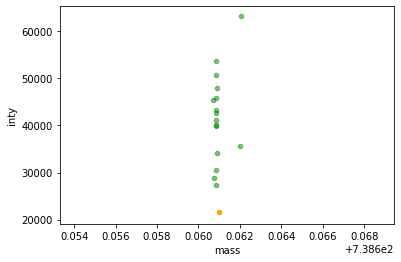

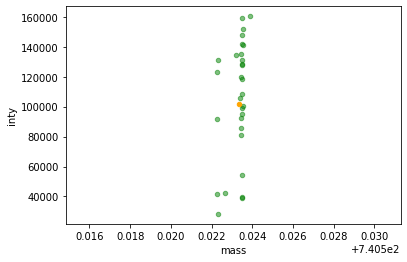

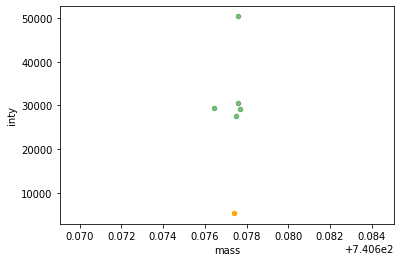

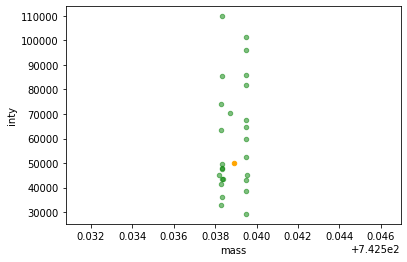

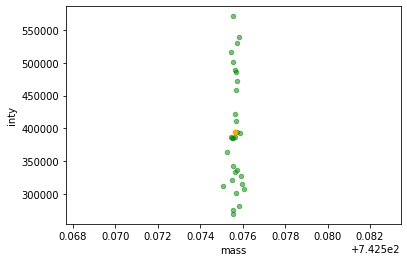

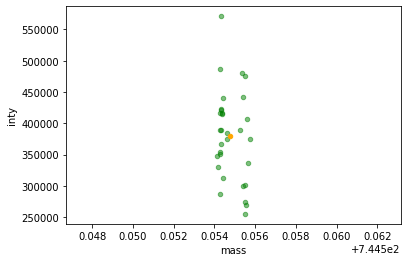

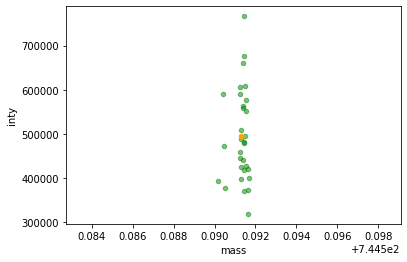

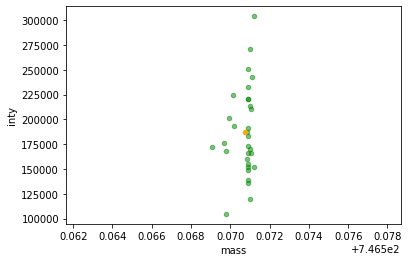

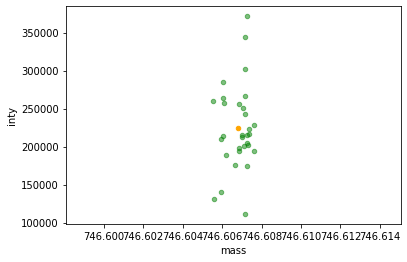

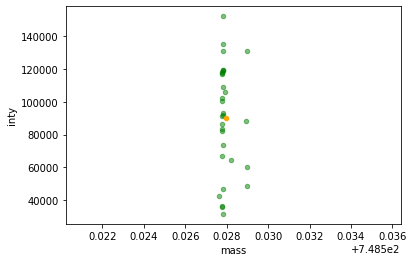

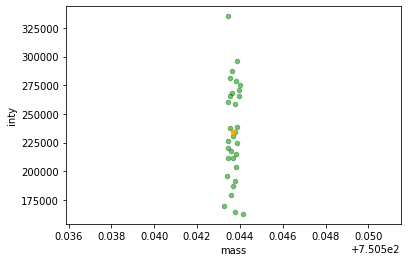

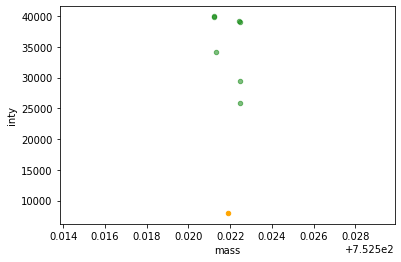

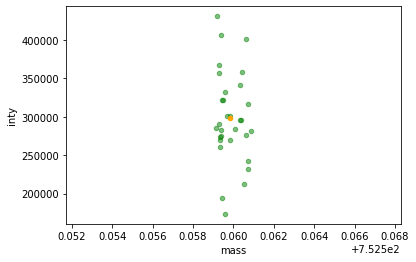

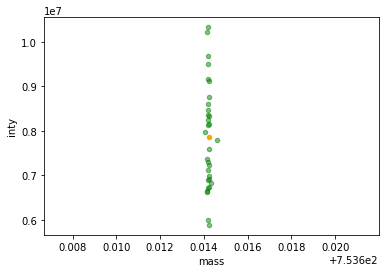

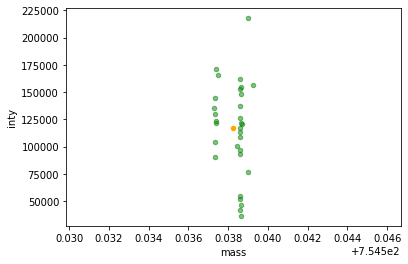

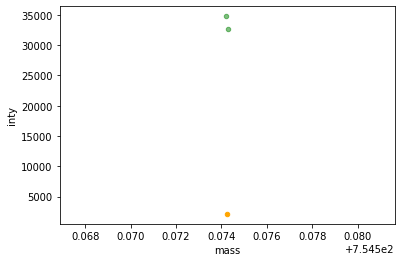

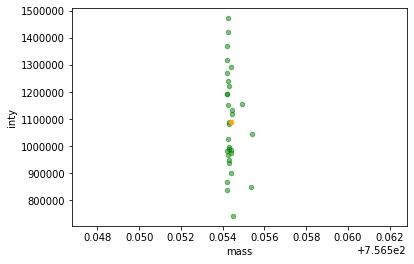

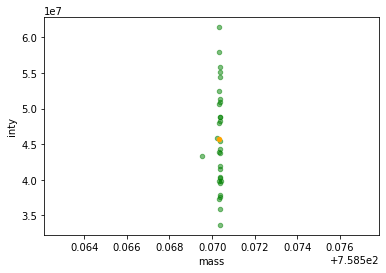

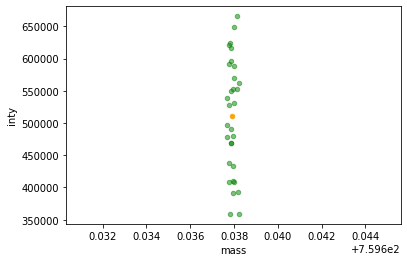

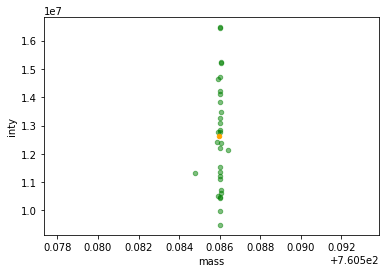

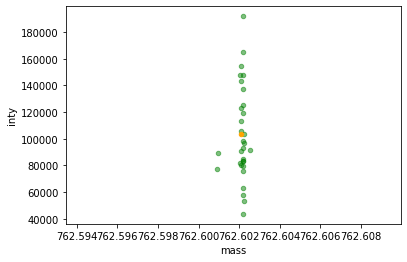

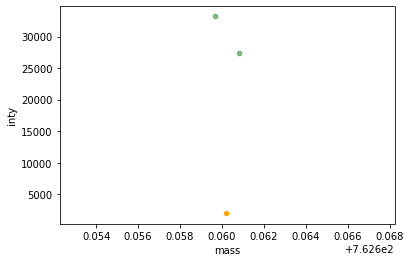

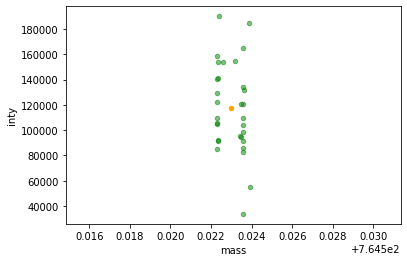

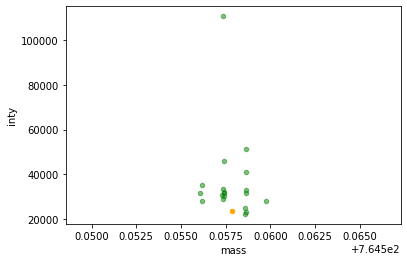

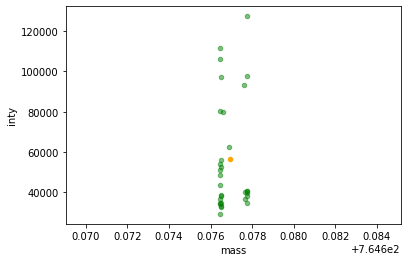

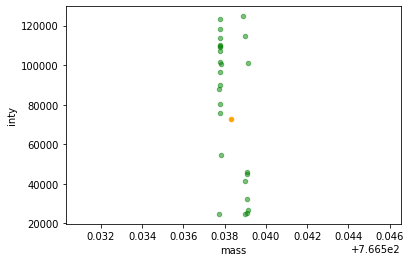

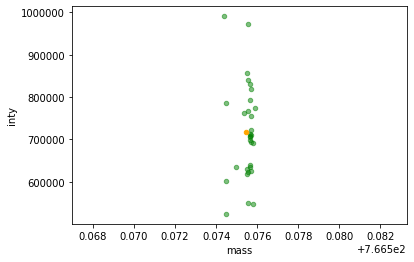

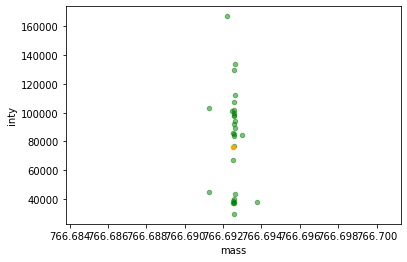

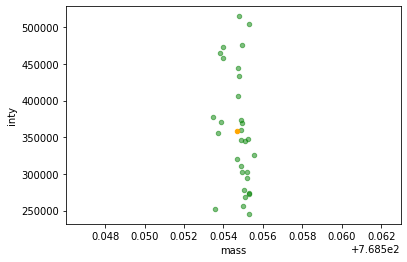

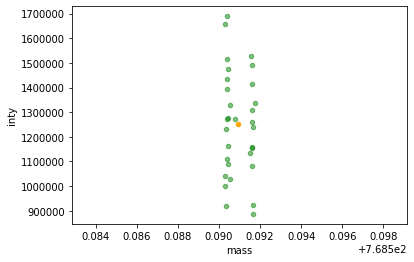

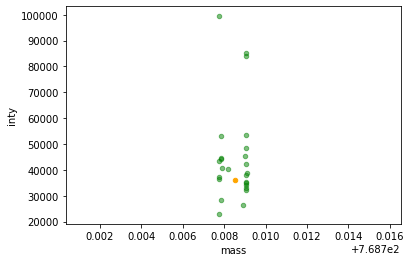

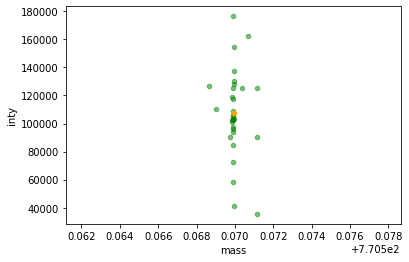

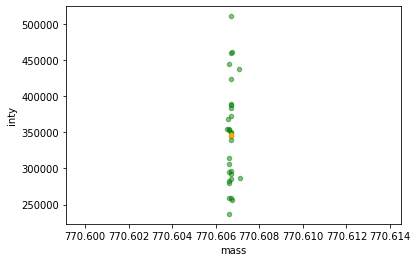

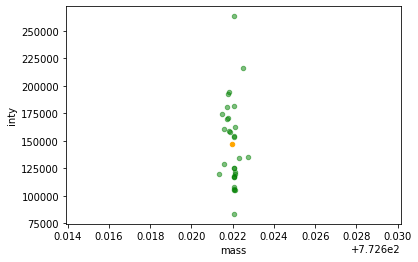

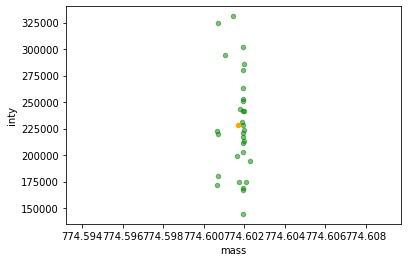

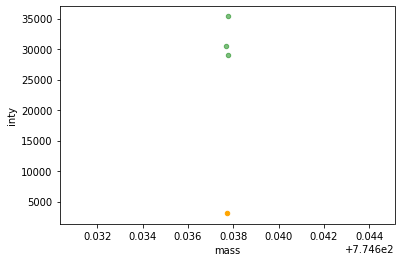

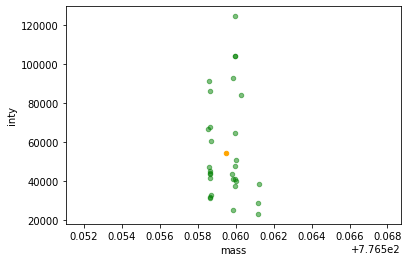

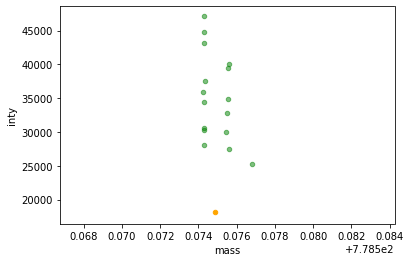

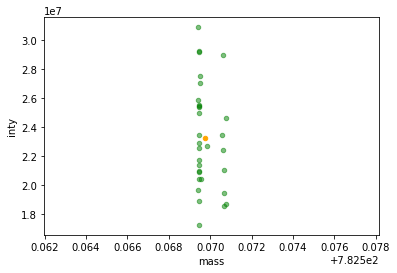

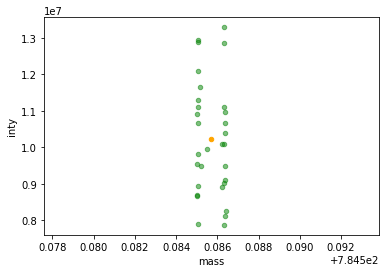

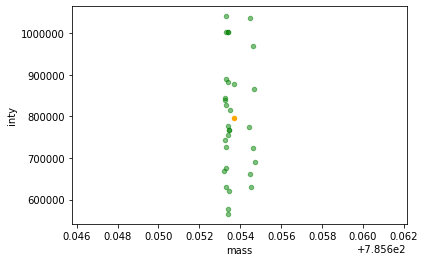

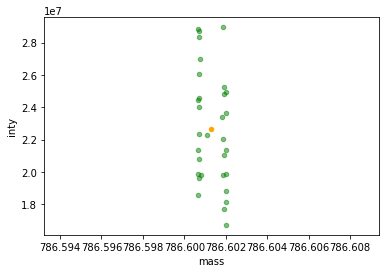

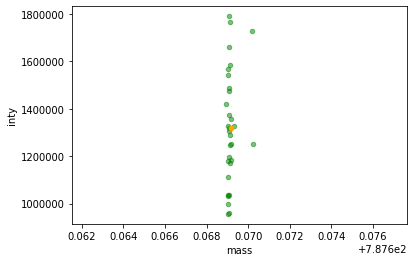

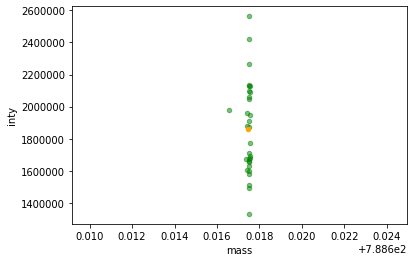

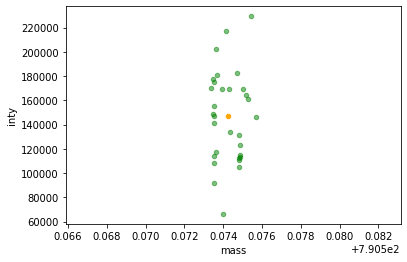

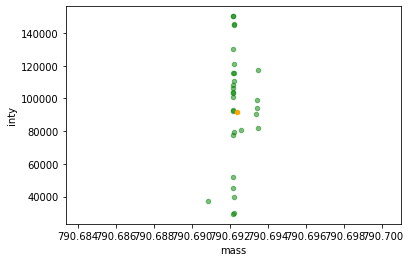

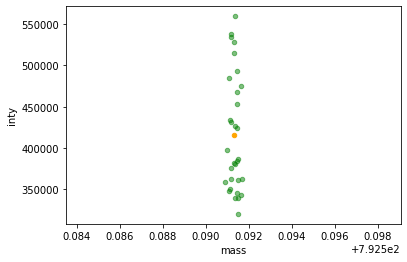

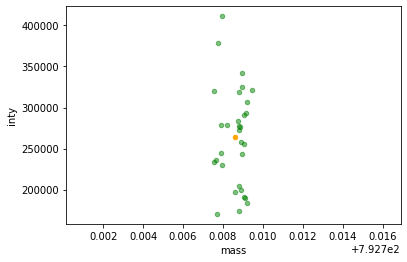

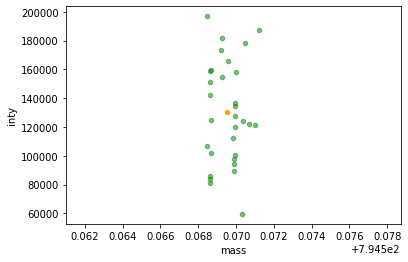

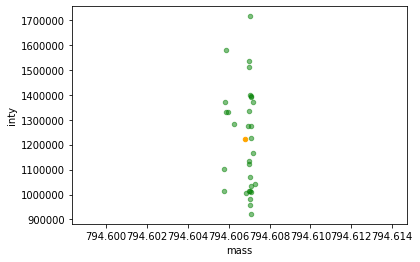

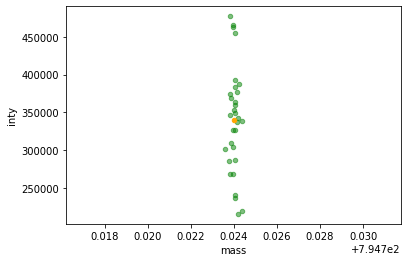

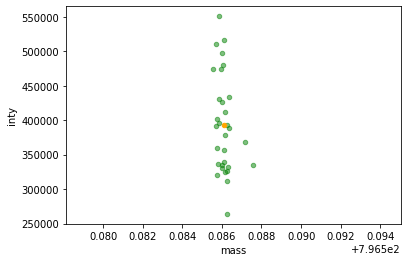

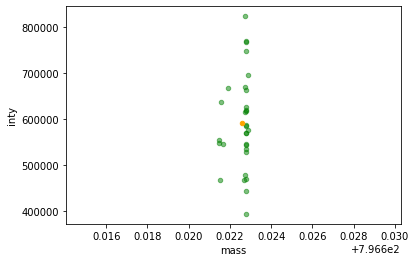

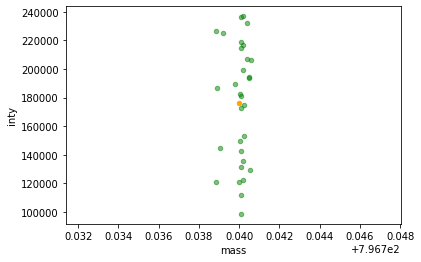

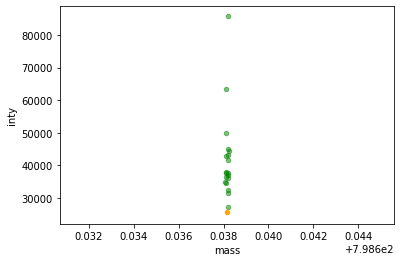

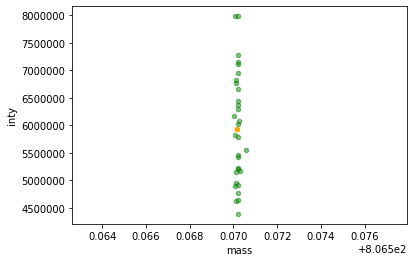

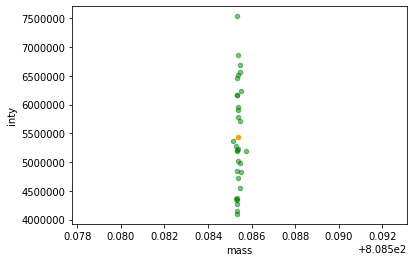

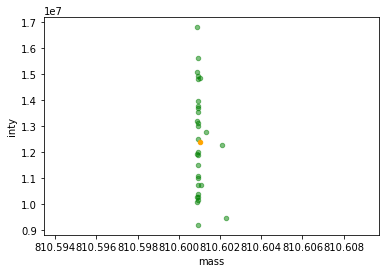

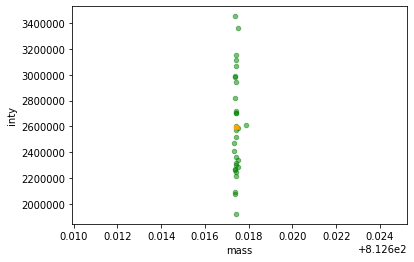

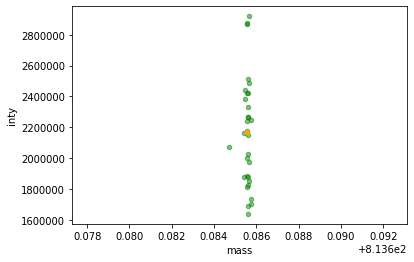

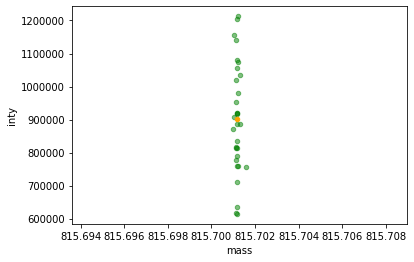

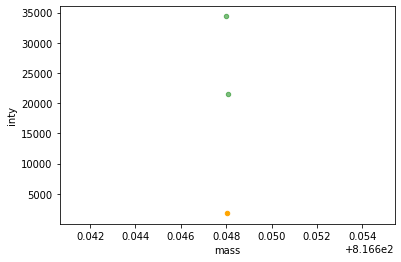

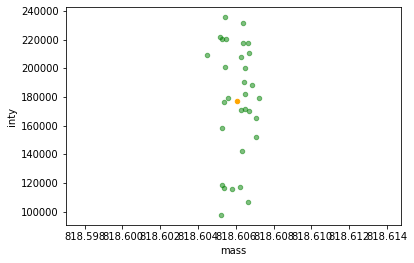

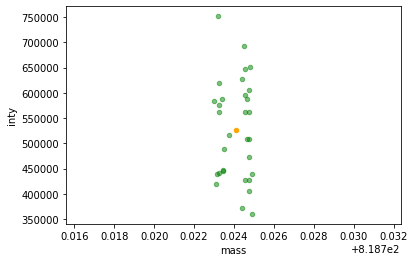

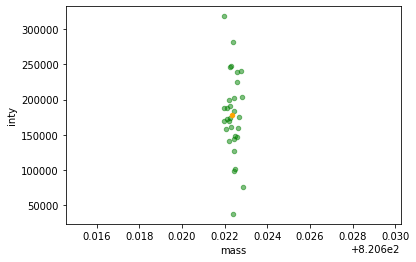

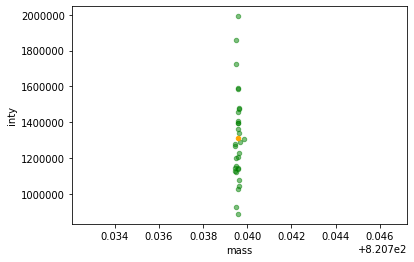

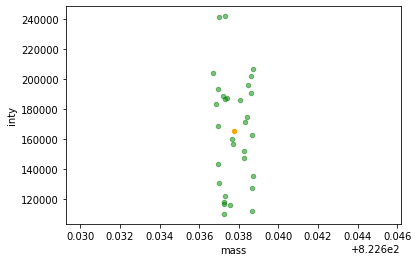

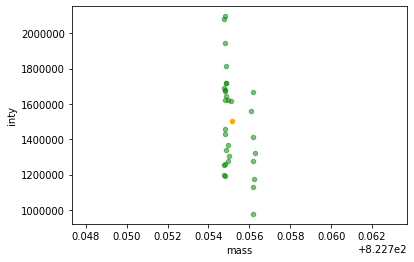

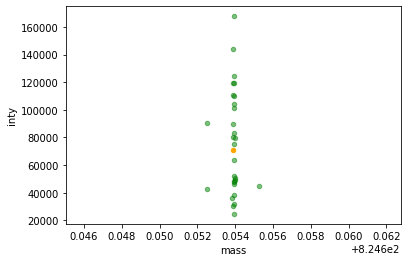

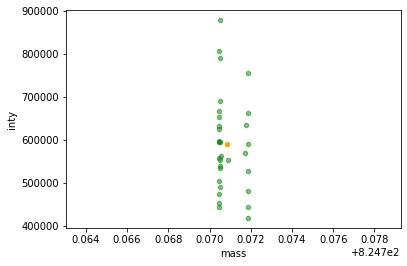

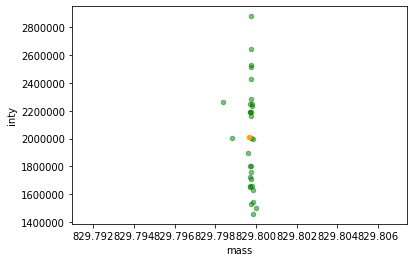

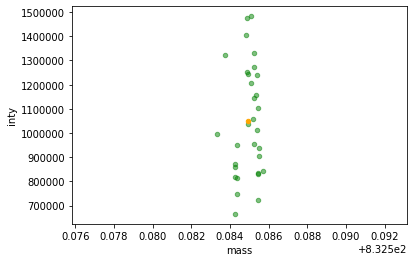

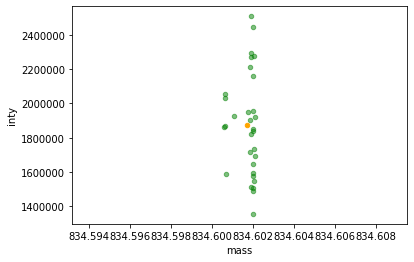

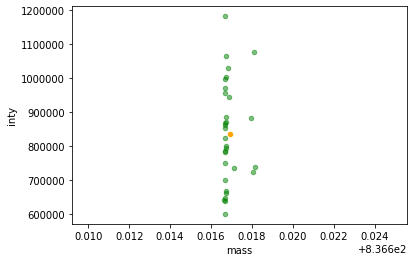

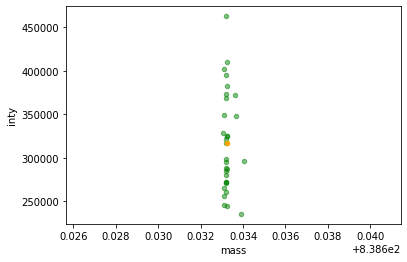

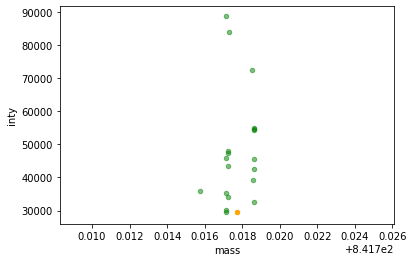

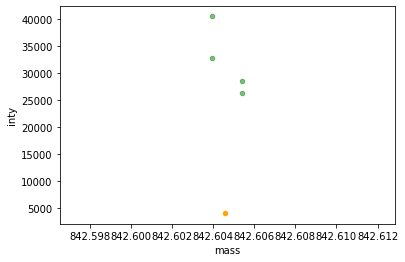

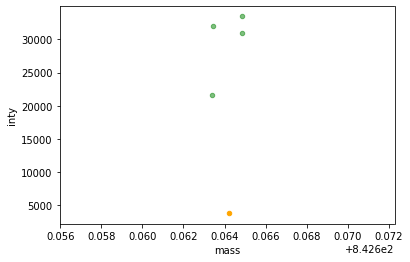

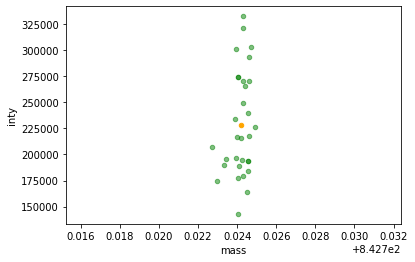

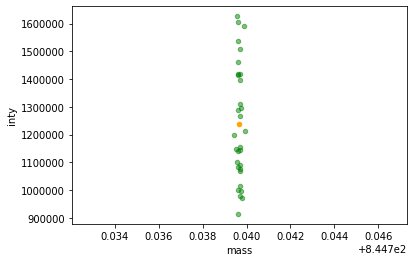

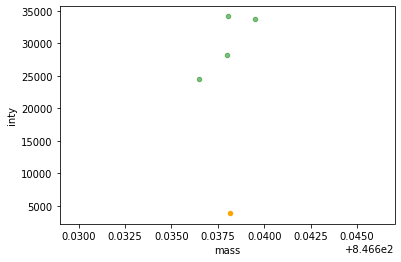

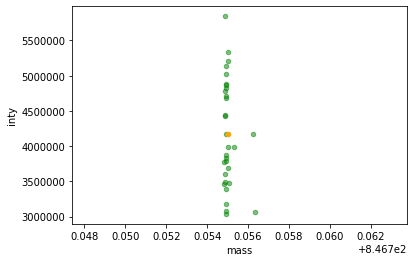

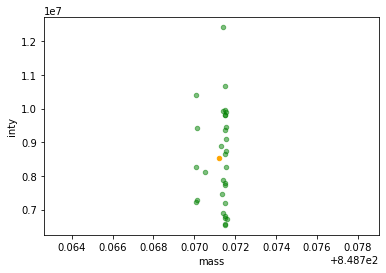

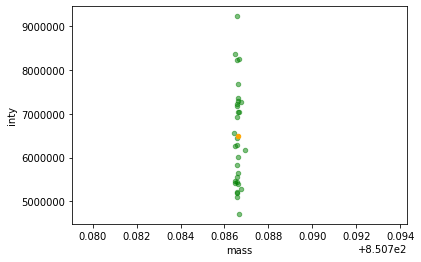

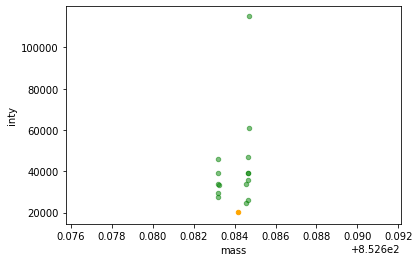

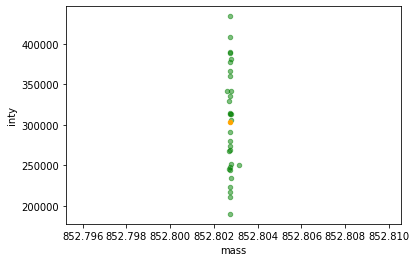

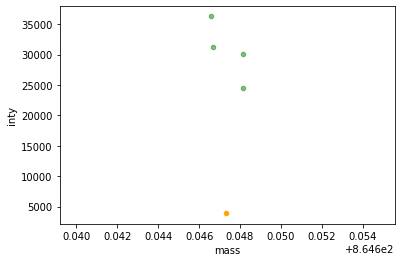

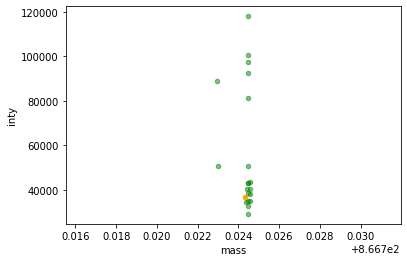

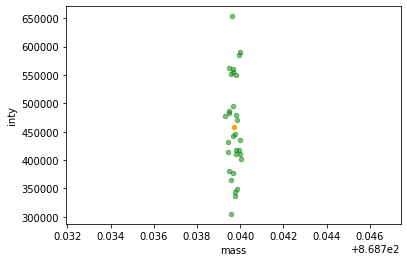

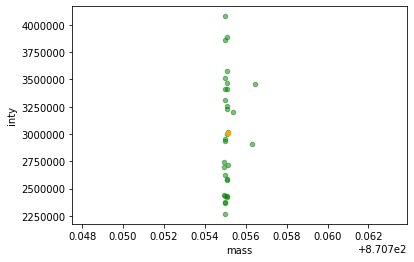

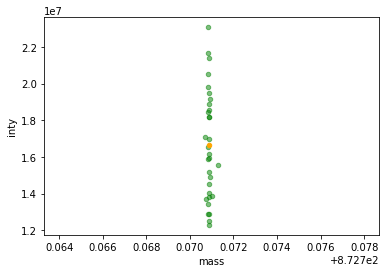

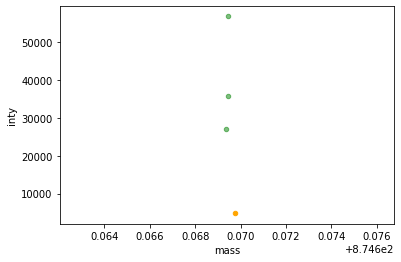

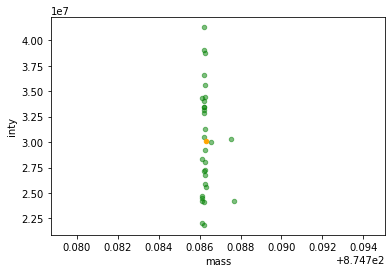

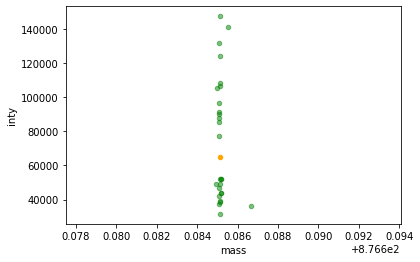

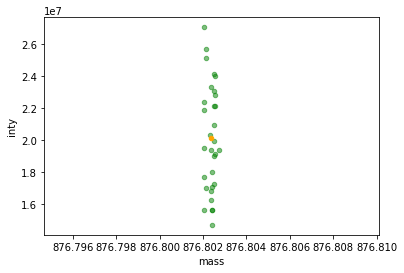

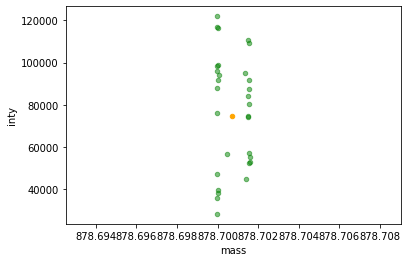

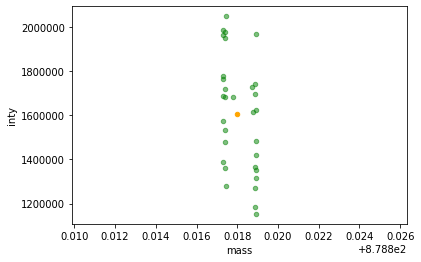

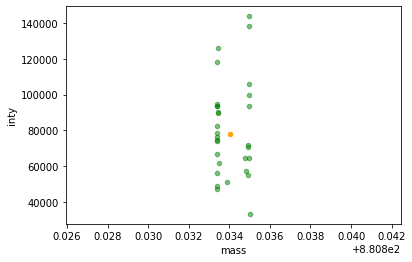

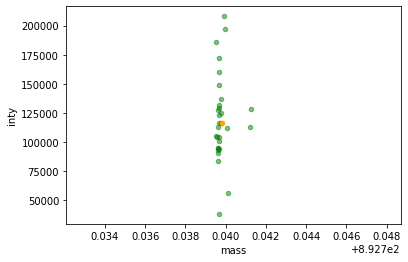

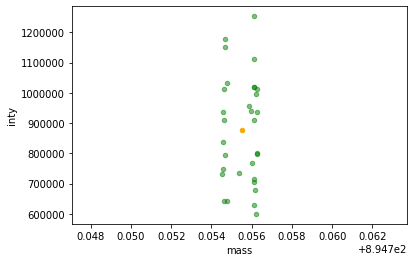

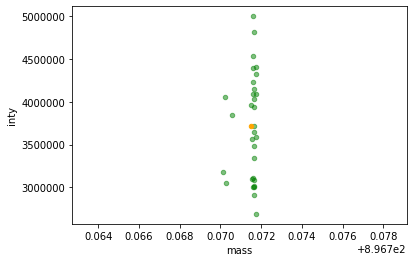

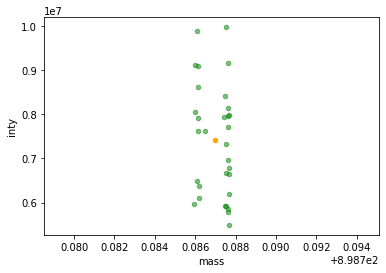

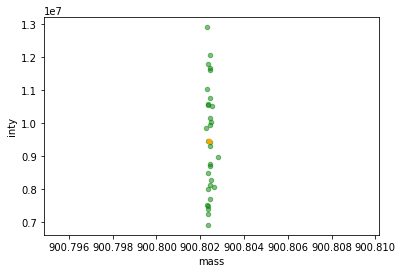

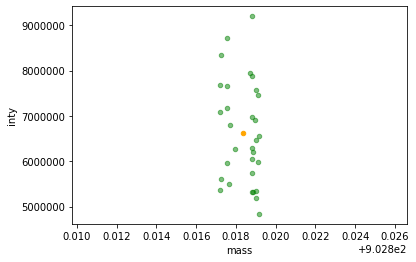

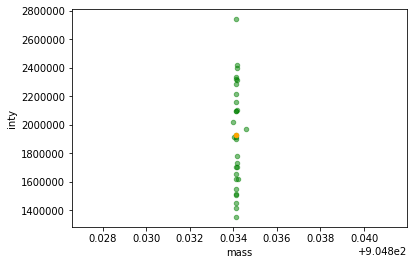

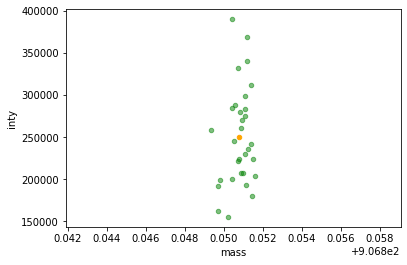

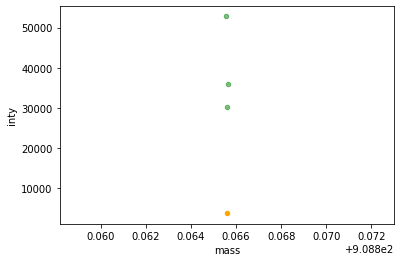

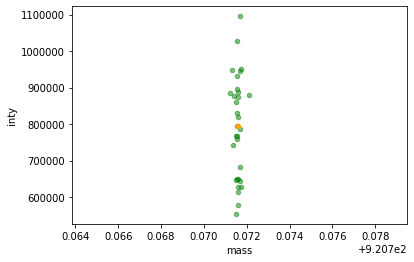

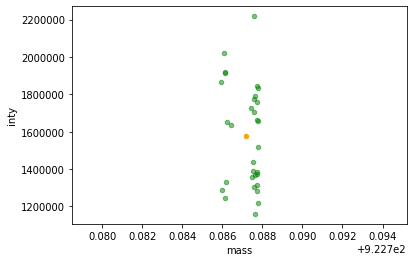

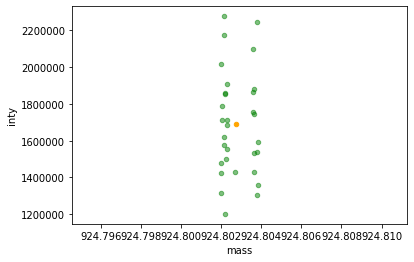

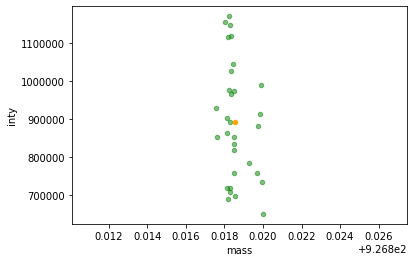

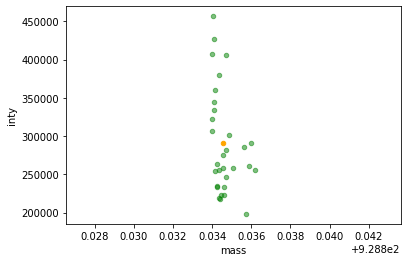

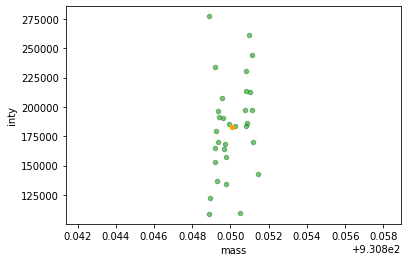

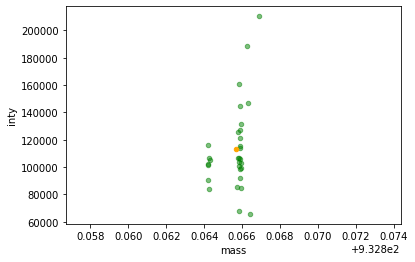

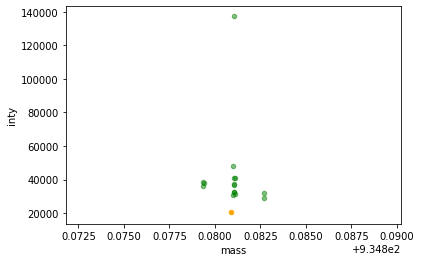

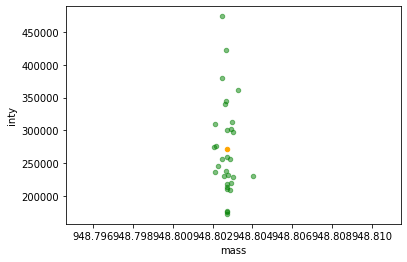

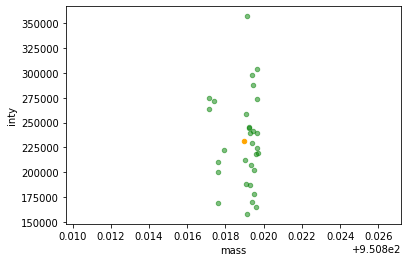

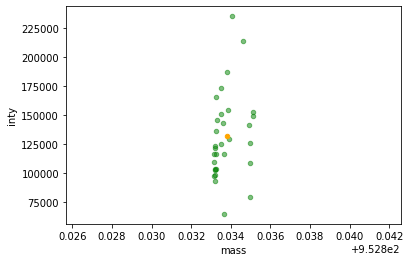

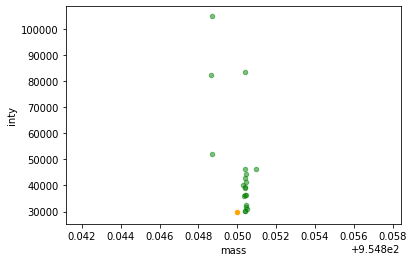

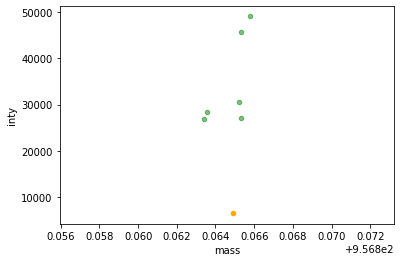

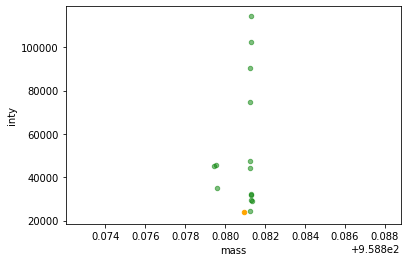

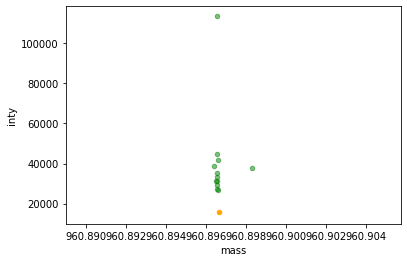

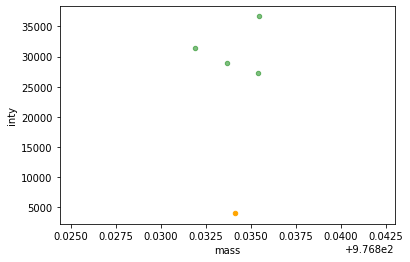

In [55]:
spectra = '190321_Serum_Lipidextract_368723_01'
for id,g_df in out_melt.groupby('MASS'):
    try:
        # ax = df.loc[(df.stem == spectra) & (df.mz.between(*ppm_range(id)))].plot.scatter(x='mz',y='inty', alpha=0.5, title =f'{id} {spectra}' ) #all peaks in blue
        # g_df.loc[g_df.variable.str.contains(spectra)].plot.scatter(x='MASS', y='value', alpha=0.5, ax = ax, color='red') # peaks from out file
        ax = lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(id)))].plot.scatter(x='mass',y='inty', alpha=0.5,  color='green', ) #lx1 peaks
        lpm_df.loc[(lpm_df.spectra.str.contains(spectra)) & (lpm_df.mass.between(*ppm_range(id)))].plot.scatter(x='mass',y='inty', ax = ax, color='orange') #lx1 bins``
    except ValueError as e:
        print(f'missing values for {id}')

In [ ]:
spectra = '190321_Serum_Lipidextract_368723_01'
out_melt['spectra'] = out_melt.variable.str.extract("INT:(.*?)\.mzML")
out_melt.loc[out_melt.variable.str.contains(spectra)]
df.loc[df.stem == spectra]
lx1_df.loc[lx1_df.spectra.str.contains(spectra)]
lpm_df.loc[lpm_df.spectra.str.contains(spectra)]
out_melt.variable.str.extract("INT:(.*?)\.mzML")

,mz,inty,stem,scan_id,filter_string,precursor_id
0,346.527954,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
1,346.528320,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
2,346.528717,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
3,354.749359,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
4,354.749756,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full ms [350.0000-2000.0000],None
...,...,...,...,...,...,...
9000,1199.119507,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
9001,1199.122070,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
9002,1212.101685,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None
9003,1212.104248,0.0,190321_Serum_Lipidextract_368723_01,controllerType=0 controllerNumber=1 scan=3161,FTMS + p NSI Full ms [350.0000-1200.0000],None


# why is 958.88 so low in the lx1 average, did I do something wrong?
intensity is low because its sum_intensity / no_scans.... even if scans dont have a signal readspectra:397

other masses of interest
954.84
824.65
810.6
766.69

776.55
778.57
848.77
874.78


# expected

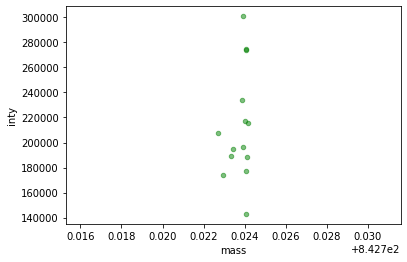

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(842.72, 5)))].plot.scatter(x='mass',y='inty', alpha=0.5, color='green', ) #lx1 peaks

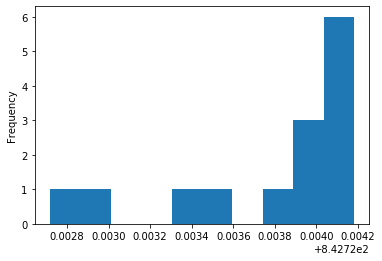

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(842.72, 5)))].mass.plot.hist()

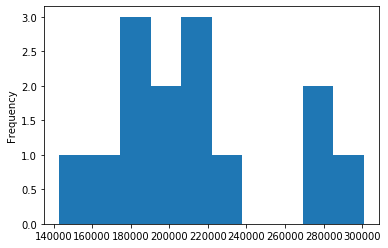

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(842.72, 5)))].inty.plot.hist()

# outlier

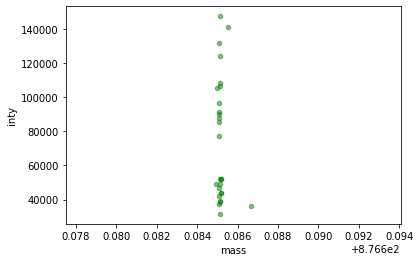

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(876.684, 5)))].plot.scatter(x='mass',y='inty', alpha=0.5, color='green', ) #lx1 peaks

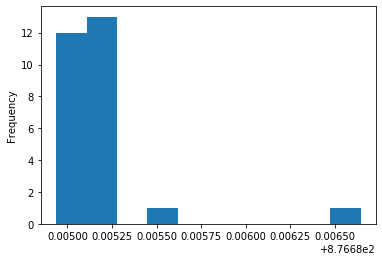

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(876.684, 5)))].mass.plot.hist()

# mass two cluster plus noise/outlier 

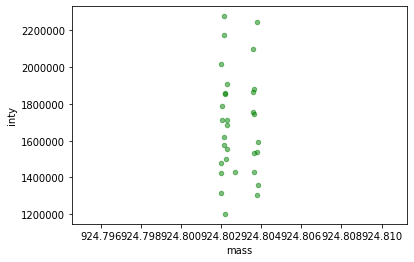

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(924.80, 5)))].plot.scatter(x='mass',y='inty', alpha=0.5, color='green', ) #lx1 peaks

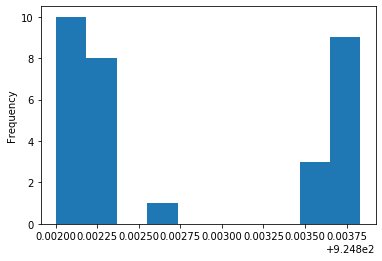

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(924.80, 5)))].mass.plot.hist()

# intensity two clusters plus outlier

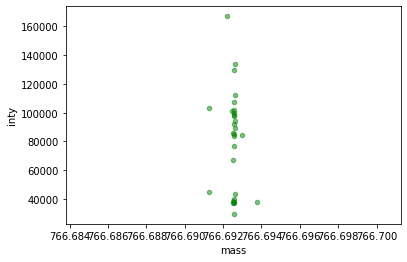

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(766.69, 5)))].plot.scatter(x='mass',y='inty', alpha=0.5, color='green', ) #lx1 peaks
# lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(766.69, 5)))].inty.plot.hist()

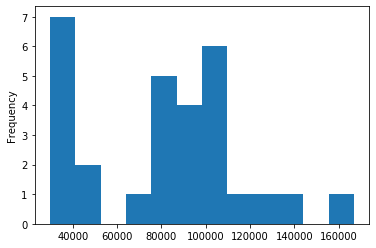

In [ ]:
lx1_df.loc[(lx1_df.spectra.str.contains(spectra)) & (lx1_df.mass.between(*ppm_range(766.69, 5)))].inty.plot.hist(bins=12)